## **Homework 2** Problem 1

In [ ]:
%matplotlib inline

### (a) Multilayer Perceptron (MLP)

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.Tensor``.

For vision, PyTorch has a package called ``torchvision``, 
that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., ``torchvision.datasets`` 
and ``torch.utils.data.DataLoader``.
This provides a huge convenience and avoids writing boilerplate code.



Load MNIST dataset using `torchvision.datasets`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [ ]:
numb_batch = 64
root = '/content/gdrive/My Drive/UW/EEP596/HW2/'

T = transforms.Compose([
    transforms.ToTensor()
])

mnist_trainset = torchvision.datasets.MNIST(root, train = True, download = True, transform = T)
mnist_testset = torchvision.datasets.MNIST(root, train = False, download = True, transform = T)
print("Print the training dataset:\n ", mnist_trainset)
print("Print the testing dataset:\n ", mnist_testset)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/gdrive/My Drive/UW/EEP596/HW2/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Print the testing dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/gdrive/My Drive/UW/EEP596/HW2/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


Visualize dataset.

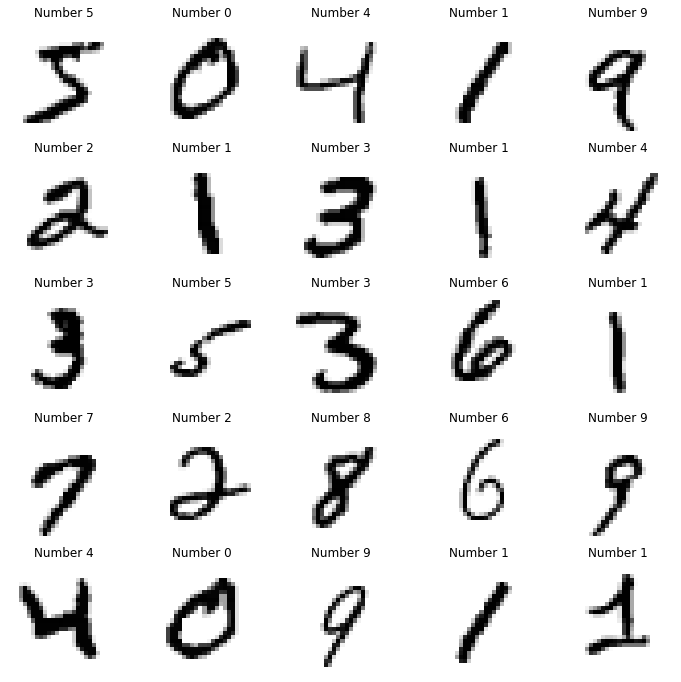

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(mnist_trainset[i][0][0], cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(mnist_trainset[i][1]))

Create dataloader for neural network.

In [ ]:
train_loader = DataLoader(mnist_trainset, batch_size = numb_batch)
test_loader = DataLoader(mnist_testset, batch_size = numb_batch)
print(train_loader)
print(test_loader)

Iterate through the dataloader.

In [ ]:
for batch_id, (data, label) in enumerate(train_loader):
  print('batch_id:', batch_id)
  print(data.shape)
  break

batch_id: 0
torch.Size([64, 1, 28, 28])


Follow the above instructions on MNIST dataset, write code to load and visualize the CIFAR-10 dataset in the similar manner.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [ ]:
class AddGaussianNoise(object):
  def __init__(self, mean=0., std=1.):
    self.std = std
    self.mean = mean
        
  def __call__(self, tensor):
    temp = torch.randn(32, 32) * 0.1
    tensor[0][:][:] = tensor[0][:][:] + temp
    tensor[1][:][:] = tensor[1][:][:] + temp
    tensor[2][:][:] = tensor[2][:][:] + temp
    return tensor
    
  def __repr__(self):
    return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

In [ ]:
CIFAR_trainset = 0
CIFAR_testset = 0
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform2 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomHorizontalFlip(p=1)])
transform3 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomCrop(size = (36, 36), pad_if_needed=True, fill=0, padding_mode='constant'), 
     transforms.RandomCrop(size = (32, 32), pad_if_needed=True, fill=0, padding_mode='constant')])
     
transform4 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomAffine(degrees=(-30,30))])
transform5 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     AddGaussianNoise(0., 1.)])

CIFAR_trainset1 = torchvision.datasets.CIFAR10(root, train = True, download = True, transform = transform1)
CIFAR_trainset2 = torchvision.datasets.CIFAR10(root, train = True, download = True, transform = transform2)
CIFAR_trainset3 = torchvision.datasets.CIFAR10(root, train = True, download = True, transform = transform3)
CIFAR_trainset4 = torchvision.datasets.CIFAR10(root, train = True, download = True, transform = transform4)
CIFAR_trainset5 = torchvision.datasets.CIFAR10(root, train = True, download = True, transform = transform5)
CIFAR_trainset = CIFAR_trainset1 + CIFAR_trainset2 + CIFAR_trainset3 + CIFAR_trainset4 + CIFAR_trainset5
CIFAR_testset = torchvision.datasets.CIFAR10(root, train = False, download = True, transform = transform1)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


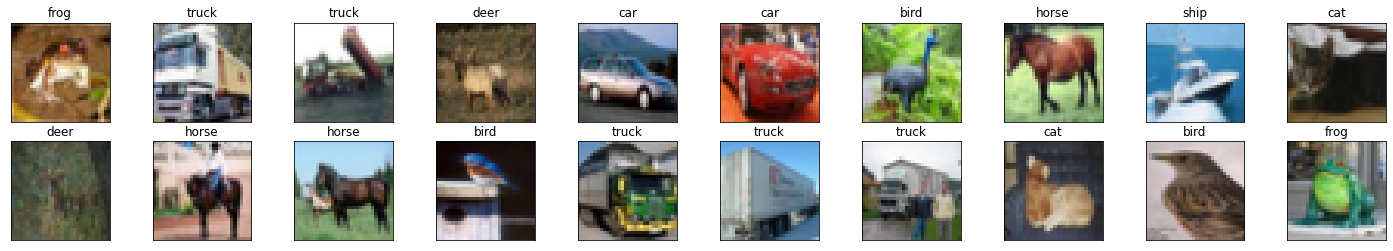

In [ ]:
# TODO: load the CIFAR-10 dataset and build dataloader
train_loader = DataLoader(CIFAR_trainset1, batch_size = numb_batch)
dataiter = iter(train_loader)
images, labels = dataiter.next()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks = [], yticks = [])
  plt.imshow(cifar_imshow(images[idx]))
  ax.set_title(classes[labels[idx]])

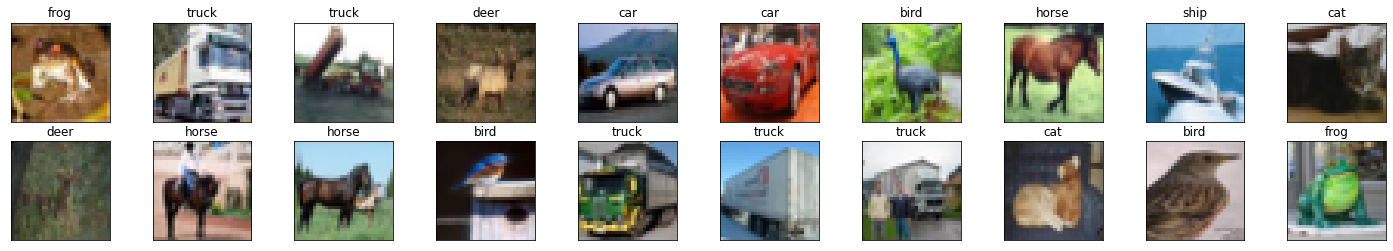

In [ ]:
train_loader = DataLoader(CIFAR_trainset2, batch_size = numb_batch)
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks = [], yticks = [])
  plt.imshow(cifar_imshow(images[idx]))
  ax.set_title(classes[labels[idx]])

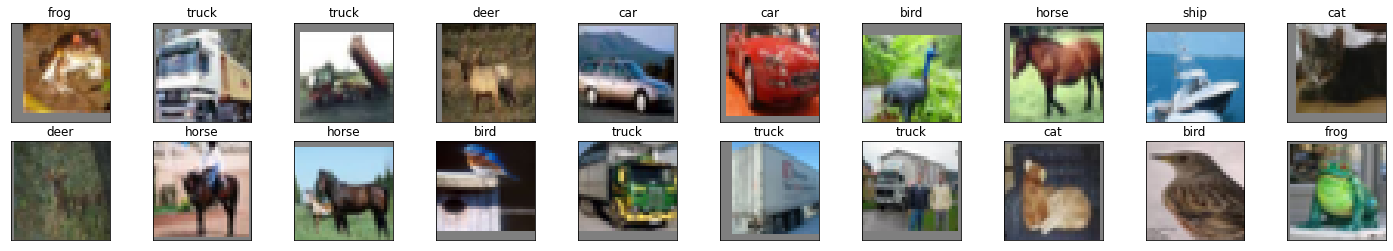

In [ ]:
train_loader = DataLoader(CIFAR_trainset3, batch_size = numb_batch)
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks = [], yticks = [])
  plt.imshow(cifar_imshow(images[idx]))
  ax.set_title(classes[labels[idx]])

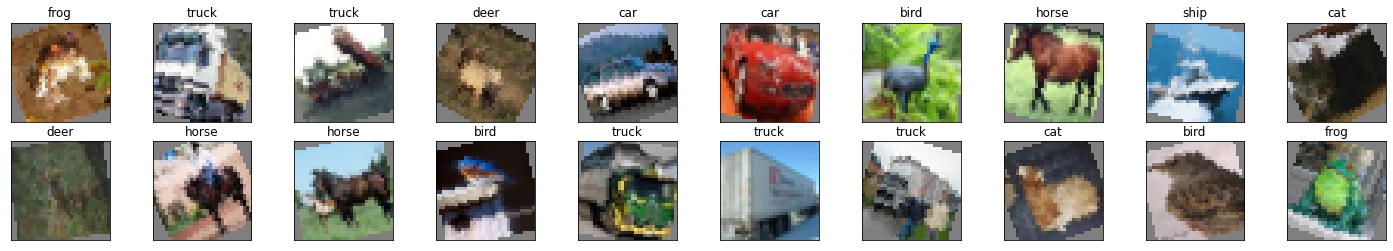

In [ ]:
train_loader = DataLoader(CIFAR_trainset4, batch_size = numb_batch)
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks = [], yticks = [])
  plt.imshow(cifar_imshow(images[idx]))
  ax.set_title(classes[labels[idx]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

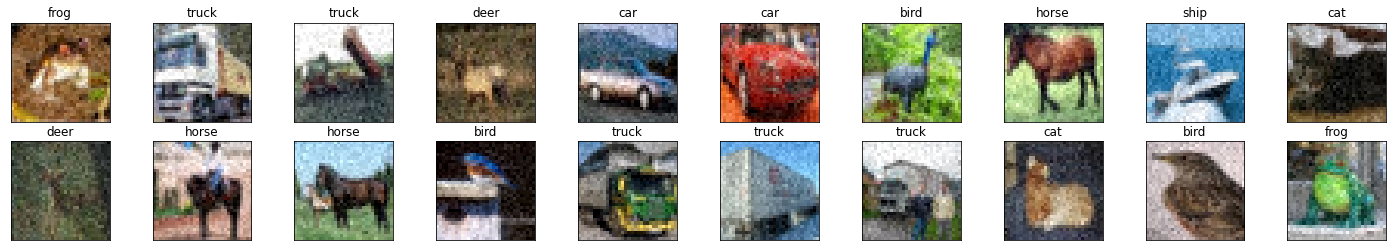

In [ ]:
train_loader = DataLoader(CIFAR_trainset5, batch_size = numb_batch)
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks = [], yticks = [])
  plt.imshow(cifar_imshow(images[idx]))
  ax.set_title(classes[labels[idx]])

Files already downloaded and verified
Print the training dataset:
Print the testing dataset:
  Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/gdrive/My Drive/UW/EEP596/HW2/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


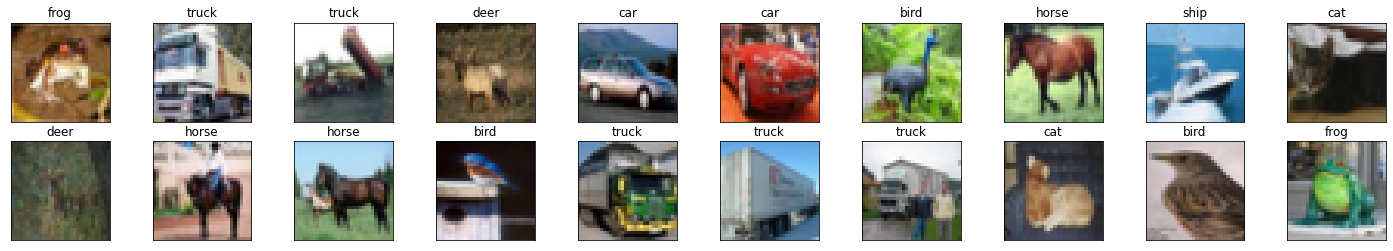

In [ ]:
train_loader = DataLoader(CIFAR_trainset, batch_size = numb_batch)
test_loader = DataLoader(CIFAR_testset, batch_size = numb_batch)

print(train_loader)
print(test_loader)

dataiter = iter(train_loader)
images, labels = dataiter.next()

fig = plt.figure(figsize = (25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks = [], yticks = [])
  plt.imshow(cifar_imshow(images[idx]))
  ax.set_title(classes[labels[idx]])
CIFAR_testset = torchvision.datasets.CIFAR10(root, train = False, download = True, transform = transform1)

print("Print the training dataset:\n ", CIFAR_trainset)
print("Print the testing dataset:\n ", CIFAR_testset)

Define an MLP neural network to do classification on CIFAR-10 dataset. 
To feed the data into the MLP, each image with dim of $3 \times 32 \times 32$ needs to be flatten into a vector with dim of $3072$.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MLP(nn.Module):
  def __init__(self, input_size, num_classes):
    super(MLP, self).__init__()
    # TODO: define your MLP

    self.fc1 = nn.Linear(input_size, 2048)
    self.fc2 = nn.Linear(2048, 1024)
    self.fc3 = nn.Linear(1024, 512)
    self.fc4 = nn.Linear(512, num_classes)
    self.softmax1 = nn.Softmax(dim = 1)
    self.dropout1 = nn.Dropout(p = 0.3)

  def forward(self, x):
    # TODO: define your forward function
    x = torch.flatten(x, start_dim=1, end_dim = -1)
    x = F.relu(self.fc1(x.float()))
    x = self.dropout1(x)
    x = F.relu(self.fc2(x))
    x = self.dropout1(x)
    x = F.relu(self.fc3(x))
    #x = self.dropout1(x)
    x = self.fc4(x)
    x = self.softmax1(x)
    return x

input_size = 3072
num_classes = 10
learning_rate = 0.0001
momentum = 0.9
batch_size = 64
num_epochs = 10

mlp = MLP(input_size = input_size, num_classes = num_classes).to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [ ]:
n_epoch = num_epochs

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


In [ ]:
# Check Accuracy
def check_accuracy(loader, model):

  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for input, label in loader:
      input = input.to(device = device)
      label = label.to(device = device)

      scores = model(input)
      #print(scores)
      #print(label)
      _, predictions = scores.max(1)
      #print(predictions)
      num_correct += (predictions == label).sum()
      num_samples += predictions.size(0)
      
    print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

  model.train()
  return 

In [ ]:
print('-----Train data-----')
check_accuracy(train_loader, mlp)
print('-----Test data-----')
check_accuracy(test_loader, mlp)

-----Train data-----
Got 145638 / 250000 with accuracy 58.26
-----Test data-----
Got 5422 / 10000 with accuracy 54.22


Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [ ]:
PATH = './mlp_cifar10.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [ ]:
mlp = MLP(input_size, num_classes).to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [ ]:
print('-----Test data-----')
check_accuracy(test_loader, mlp)

-----Test data-----
Got 5422 / 10000 with accuracy 54.22


### (c) Convolution Neural Network (CNN)

Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous PyTorch tutorial code and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # TODO: define your CNN
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    #output_h =（originalSize_h+padding*2-kernelSize_h）/stride +1
    
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size = (5,5))
    self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size = (5,5))
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120)  
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.softmax1 = nn.Softmax(dim = 1)
    #self.dropout1 = nn.Dropout(p = 0.2)

  def forward(self, x):
    # Max pooling over a (2, 2) window
    x = self.pool(F.relu(self.conv1(x))) #14
    # If the size is a square you can only specify a single number
    #x = self.dropout1(x)
    x = self.pool(F.relu(self.conv2(x))) #5
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.softmax1((self.fc3(x)))
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

cnn = CNN().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

Train the network.

In [ ]:
n_epoch = 10

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for i, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = cnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
# Check Accuracy
def check_accuracy(loader, model):

  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for input, label in loader:
      input = input.to(device = device)
      label = label.to(device = device)

      scores = model(input)
      #print(scores)
      #print(label)
      _, predictions = scores.max(1)
      #print(predictions)
      num_correct += (predictions == label).sum()
      num_samples += predictions.size(0)
      
    print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

  model.train()
  return 
    
print('-----Train data-----')
check_accuracy(train_loader, cnn)
print('-----Test data-----')
check_accuracy(test_loader, cnn)

-----Train data-----
Got 157305 / 250000 with accuracy 62.92
-----Test data-----
Got 6129 / 10000 with accuracy 61.29


###Attempt 1:

In [ ]:
class CNN1(nn.Module):
  def __init__(self):
    super(CNN1, self).__init__()
    # TODO: define your CNN
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    #output_h =（originalSize_h+padding*2-kernelSize_h）/stride +1

    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3), padding = (1, 1))
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), padding = (1, 1))
    self.pool = nn.MaxPool2d(kernel_size = (2, 2), stride = (2, 2))
    self.batchnorm1 = nn.BatchNorm2d(64)
    
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.conv3_1 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm3 = nn.BatchNorm2d(128)

    self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.conv4_1 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm4 = nn.BatchNorm2d(256)
    
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(256 * 4 * 4, 1024)  
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)
    self.softmax1 = nn.Softmax(dim = 1)
    

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.batchnorm1(x)

    x = F.relu(self.conv3(x))
    x = F.relu(self.conv3_1(x))
    x = self.pool(x)
    x = self.batchnorm3(x)

    x = F.relu(self.conv4(x))
    x = F.relu(self.conv4_1(x))
    x = self.pool(x)
    x = self.batchnorm4(x)
    
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.softmax1((self.fc3(x)))
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

cnn1 = CNN1().to(device)  # operate on GPU

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, weight_decay=0.0005)

In [40]:
n_epoch = 10

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for i, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = cnn1(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [41]:
print('-----Train data-----')
check_accuracy(train_loader, cnn1)
print('-----Test data-----')
check_accuracy(test_loader, cnn1)

-----Train data-----
Got 184541 / 250000 with accuracy 73.82
-----Test data-----
Got 7358 / 10000 with accuracy 73.58


###Attempt 2:

In [ ]:
class CNN2(nn.Module):
  def __init__(self):
    super(CNN2, self).__init__()
    # TODO: define your CNN
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    #output_h =（originalSize_h+padding*2-kernelSize_h）/stride +1

    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (5, 5), padding = (2, 2))
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (5, 5), padding = (2, 2))
    self.pool = nn.MaxPool2d(kernel_size = (2, 2), stride = (2, 2))
    self.batchnorm1 = nn.BatchNorm2d(64)
    
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (5, 5), padding = (2, 2))
    self.conv3_1 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (5, 5), padding = (2, 2))
    self.batchnorm3 = nn.BatchNorm2d(128)

    self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (5, 5), padding = (2, 2))
    self.conv4_1 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm4 = nn.BatchNorm2d(256)
    
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(256 * 4 * 4, 1024)  
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)
    self.softmax1 = nn.Softmax(dim = 1)
    

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.batchnorm1(x)

    x = F.relu(self.conv3(x))
    x = F.relu(self.conv3_1(x))
    x = self.pool(x)
    x = self.batchnorm3(x)

    x = F.relu(self.conv4(x))
    x = F.relu(self.conv4_1(x))
    x = self.pool(x)
    x = self.batchnorm4(x)
    
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.softmax1((self.fc3(x)))
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

cnn2 = CNN2().to(device)  # operate on GPU

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001, weight_decay=0.0005)

In [ ]:
n_epoch = 10

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for i, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = cnn2(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [ ]:
print('-----Train data-----')
check_accuracy(train_loader, cnn2)
print('-----Test data-----')
check_accuracy(test_loader, cnn2)

-----Train data-----
Got 175136 / 250000 with accuracy 70.05
-----Test data-----
Got 7043 / 10000 with accuracy 70.43


### Attempt 3:


In [ ]:
class CNN3(nn.Module):
  def __init__(self):
    super(CNN3, self).__init__()
    # TODO: define your CNN
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    #output_h =（originalSize_h+padding*2-kernelSize_h）/stride +1

    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3), padding = (1, 1))
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), padding = (1, 1))
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.pool = nn.MaxPool2d(kernel_size = (2, 2), stride = (2, 2))
    self.batchnorm1 = nn.BatchNorm2d(128)
    
    self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.conv5 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = (3, 3), padding = (1, 1))
    self.conv6 = nn.Conv2d(in_channels = 512, out_channels = 1024, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm2 = nn.BatchNorm2d(1024)

    self.conv7 = nn.Conv2d(in_channels = 1024, out_channels = 2048, kernel_size = (3, 3), padding = (1, 1))
    self.conv8 = nn.Conv2d(in_channels = 2048, out_channels = 4096, kernel_size = (3, 3), padding = (1, 1))
    self.conv9 = nn.Conv2d(in_channels = 4096, out_channels = 4096, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm3 = nn.BatchNorm2d(4096)
    
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(4096 * 4 * 4, 1024)  
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 256)
    self.fc4 = nn.Linear(256, 100)
    self.fc5 = nn.Linear(100, 10)
    self.softmax1 = nn.Softmax(dim = 1)
    

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = self.pool(x)
    x = self.batchnorm1(x)

    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    x = self.pool(x)
    x = self.batchnorm2(x)

    x = F.relu(self.conv7(x))
    x = F.relu(self.conv8(x))
    x = F.relu(self.conv9(x))
    x = self.pool(x)
    x = self.batchnorm3(x)
    
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.softmax1((self.fc5(x)))
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

cnn3 = CNN3().to(device)  # operate on GPU

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn3.parameters(), lr=0.001, weight_decay=0.0005)

In [ ]:
n_epoch = 10

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for i, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = cnn3(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [ ]:
print('-----Train data-----')
check_accuracy(train_loader, cnn3)
print('-----Test data-----')
check_accuracy(test_loader, cnn3)

-----Train data-----
Got 139368 / 250000 with accuracy 55.75
-----Test data-----
Got 5725 / 10000 with accuracy 57.25


###Attempt 4:

In [ ]:
class CNN4(nn.Module):
  def __init__(self):
    super(CNN4, self).__init__()
    # TODO: define your CNN
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    #output_h =（originalSize_h+padding*2-kernelSize_h）/stride +1

    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3), padding = (1, 1))
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), padding = (1, 1))
    self.pool = nn.MaxPool2d(kernel_size = (2, 2), stride = (2, 2))
    self.batchnorm1 = nn.BatchNorm2d(64)
    
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.conv3_1 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm3 = nn.BatchNorm2d(128)

    self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.conv4_1 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm4 = nn.BatchNorm2d(256)
    
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(256 * 4 * 4, 1024)  
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)
    self.dropout1 = nn.Dropout(p=0.3)
    self.softmax1 = nn.Softmax(dim = 1)
    
    

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.batchnorm1(x)

    x = F.relu(self.conv3(x))
    x = F.relu(self.conv3_1(x))
    x = self.pool(x)
    x = self.batchnorm3(x)

    x = F.relu(self.conv4(x))
    x = F.relu(self.conv4_1(x))
    x = self.pool(x)
    x = self.batchnorm4(x)
    
    x = x.view(-1, self.num_flat_features(x))
    x = self.dropout1(x)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = F.relu(self.fc2(x))
    x = self.softmax1((self.fc3(x)))
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

cnn4 = CNN4().to(device)  # operate on GPU

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn4.parameters(), lr=0.001, weight_decay=0.0005)

In [ ]:
n_epoch = 10

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for i, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = cnn4(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
print('-----Train data-----')
check_accuracy(train_loader, cnn4)
print('-----Test data-----')
check_accuracy(test_loader, cnn4)

-----Train data-----
Got 175635 / 250000 with accuracy 70.25
-----Test data-----
Got 7004 / 10000 with accuracy 70.04


### Attempt 5:

In [ ]:
class CNN5(nn.Module):
  def __init__(self):
    super(CNN5, self).__init__()
    # TODO: define your CNN
    # 1 input image channel, 6 output channels, 3x3 square convolution
    # kernel
    #output_h =（originalSize_h+padding*2-kernelSize_h）/stride +1

    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm1 = nn.BatchNorm2d(32)
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), padding = (1, 1))
    self.pool = nn.MaxPool2d(kernel_size = (2, 2), stride = (2, 2))
    
    
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm3 = nn.BatchNorm2d(128)
    self.conv3_1 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3, 3), padding = (1, 1))
    self.dropout3 = nn.Dropout2d(p = 0.05)

    self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    self.batchnorm4 = nn.BatchNorm2d(256)
    self.conv4_1 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3, 3), padding = (1, 1))
    
    
    # an affine operation: y = Wx + b
    self.dropoutfc = nn.Dropout(p = 0.1)
    self.fc1 = nn.Linear(4096, 1024)  
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)
    self.softmax1 = nn.Softmax(dim = 1)
    

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.batchnorm1(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
   

    x = F.relu(self.conv3(x))
    x = self.batchnorm3(x)
    x = F.relu(self.conv3_1(x))
    x = self.pool(x)
    x = self.dropout3(x)

    x = F.relu(self.conv4(x))
    x = self.batchnorm4(x)
    x = F.relu(self.conv4_1(x))
    x = self.pool(x)
    
    
    x = x.view(-1, self.num_flat_features(x))
    x = self.dropoutfc(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.dropoutfc(x)
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

cnn5 = CNN5().to(device)  # operate on GPU

In [ ]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn5.parameters(), lr=0.001)

In [ ]:
n_epoch = 10

for epoch in range(n_epoch):  # loop over the dataset multiple times
  for i, (inputs, labels) in enumerate(train_loader, 0):
    # TODO: write training code
    inputs = inputs.to(device = device)
    labels = labels.to(device = device)

    optimizer.zero_grad()
    outputs = cnn5(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [ ]:
print('-----Train data-----')
check_accuracy(train_loader, cnn5)
print('-----Test data-----')
check_accuracy(test_loader, cnn5)

-----Train data-----
Got 230995 / 250000 with accuracy 92.40
-----Test data-----
Got 8393 / 10000 with accuracy 83.93


###Save the trained model.

Save the trained model. (Do not upload your trained model to Canvas.)

In [ ]:
PATH = './weights/cnn5_cifar10.pth'
torch.save(cnn5.state_dict(), PATH)

Evaluate the classfication performance on the testing set.

In [ ]:
# Calculated above!

### (d) Discussions

Write your answers here.

1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

Ans: In my opinion, CNN can achieve higher accuracy.
This is because the convolution layers in CNN can learn related information that are nearby using kernel. However, MLP uses fully connected layers, which take all the information and calculate together, some important part were mixed with less important part and turns out have less accuracy.

2) Which parameter can potentially affect your performance most?

Ans: I think the numbers of convolution layer affect performance the most. In this project, compare 3 convolution layers with 6 convolution layers, I got 50% on 3 layers and 80% on 6 layers.